In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score

In [2]:
# Load the dataset 
diabetes_df = pd.read_csv('diabetes_health_indicators.csv')


In [3]:
# Head of the dataset
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Shape of the dataset
diabetes_df.shape

(253680, 22)

In [5]:
# Info of the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
Diabetes_binary         253680 non-null float64
HighBP                  253680 non-null float64
HighChol                253680 non-null float64
CholCheck               253680 non-null float64
BMI                     253680 non-null float64
Smoker                  253680 non-null float64
Stroke                  253680 non-null float64
HeartDiseaseorAttack    253680 non-null float64
PhysActivity            253680 non-null float64
Fruits                  253680 non-null float64
Veggies                 253680 non-null float64
HvyAlcoholConsump       253680 non-null float64
AnyHealthcare           253680 non-null float64
NoDocbcCost             253680 non-null float64
GenHlth                 253680 non-null float64
MentHlth                253680 non-null float64
PhysHlth                253680 non-null float64
DiffWalk                253680 non-null float64
Sex                     2

In [6]:
# Descriptive statistics
print(diabetes_df.describe())

       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

In [7]:
# Check for missing values
diabetes_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

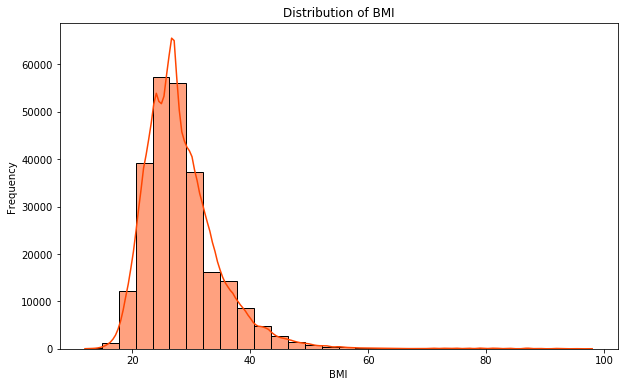

In [8]:
# Distribution of BMI
plt.figure(figsize=(10,6))
sns.histplot(diabetes_df['BMI'], kde=True, bins=30, color='orangered')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

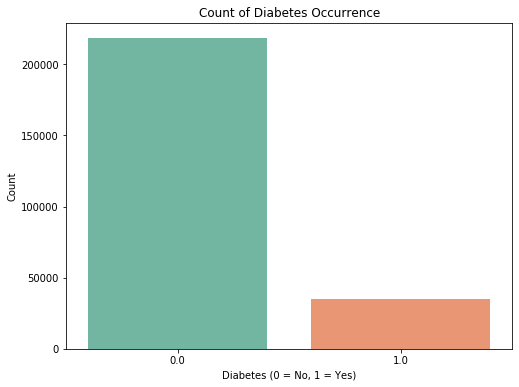

In [9]:
# Count plot of diabetes occurrence (Diabetes_binary)
plt.figure(figsize=(8,6))
sns.countplot(x='Diabetes_binary', data=diabetes_df, palette='Set2')
plt.title('Count of Diabetes Occurrence')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

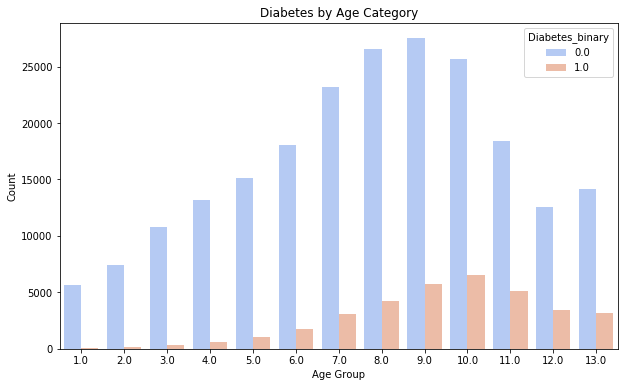

In [10]:
# Diabetes by Age Category
plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Diabetes_binary', data=diabetes_df, palette='coolwarm')
plt.title('Diabetes by Age Category')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

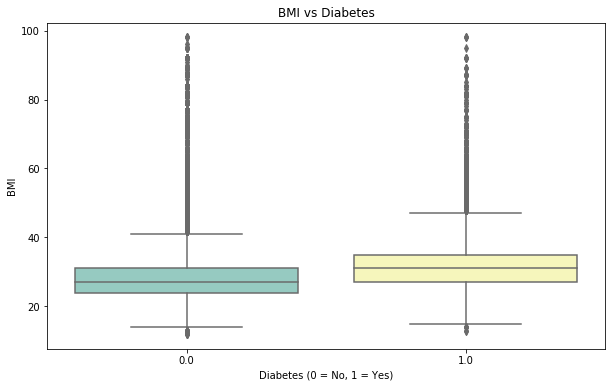

In [11]:
# Relationship between BMI and Diabetes
plt.figure(figsize=(10,6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=diabetes_df, palette='Set3')
plt.title('BMI vs Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

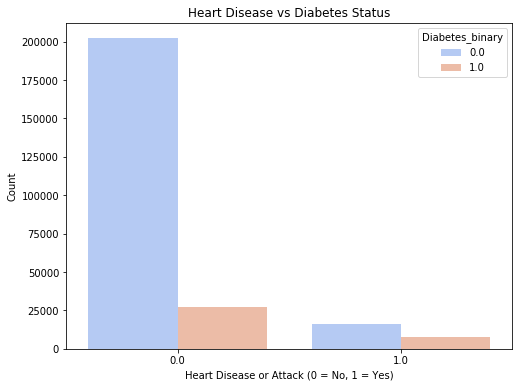

In [12]:
# Count plot of Heart Disease vs Diabetes Status
plt.figure(figsize=(8,6))
sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_binary', data=diabetes_df, palette='coolwarm')
plt.title('Heart Disease vs Diabetes Status')
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


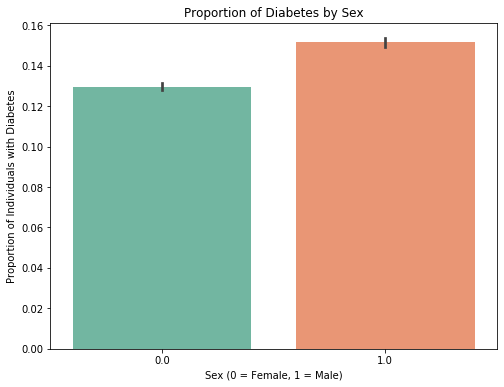

In [13]:
# Bar plot for proportion of Diabetes by Sex
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Diabetes_binary', data=diabetes_df, palette='Set2')
plt.title('Proportion of Diabetes by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Proportion of Individuals with Diabetes')
plt.show()



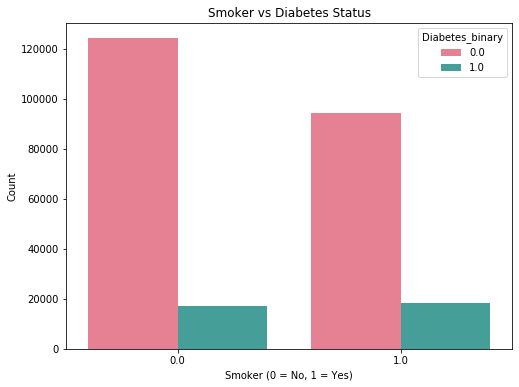

In [14]:
# Count plot for Smoker vs Diabetes with the 'pastel' color palette
plt.figure(figsize=(8,6))
sns.countplot(x='Smoker', hue='Diabetes_binary', data=diabetes_df, palette='husl')
plt.title('Smoker vs Diabetes Status')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


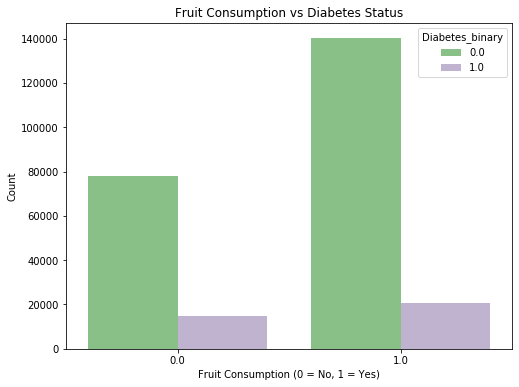

In [15]:
# Count plot for Fruit Consumption vs Diabetes Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Fruits', hue='Diabetes_binary', data=diabetes_df, palette='Accent')
plt.title('Fruit Consumption vs Diabetes Status')
plt.xlabel('Fruit Consumption (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

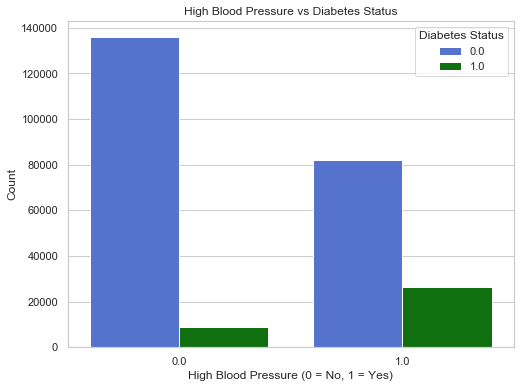

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=diabetes_df, palette=['royalblue', 'green'])  # Standard Blue and Green
plt.title('High Blood Pressure vs Diabetes Status')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', loc='upper right')
plt.show()


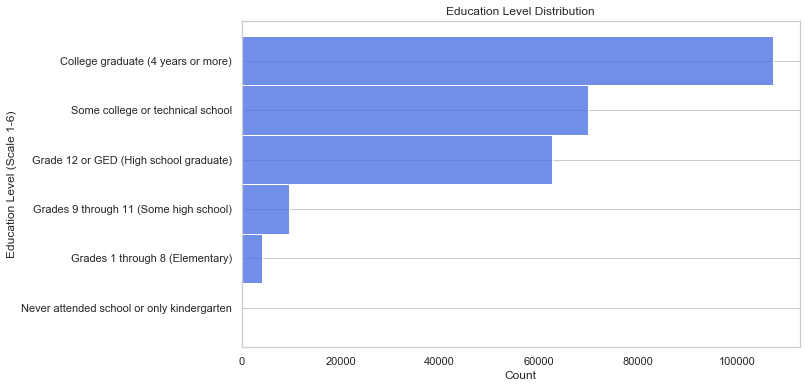

In [39]:
# Set the style for the plots
sns.set(style='whitegrid')

# Create the horizontal histogram for Education Level
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetes_df, y='Education', bins=6, kde=False, color='royalblue', discrete=True)
plt.title('Education Level Distribution')
plt.ylabel('Education Level (Scale 1-6)')
plt.xlabel('Count')
plt.yticks(ticks=range(1, 7), labels=[
    'Never attended school or only kindergarten',
    'Grades 1 through 8 (Elementary)',
    'Grades 9 through 11 (Some high school)',
    'Grade 12 or GED (High school graduate)',
    'Some college or technical school',
    'College graduate (4 years or more)'
])
plt.grid(axis='x')
plt.show()


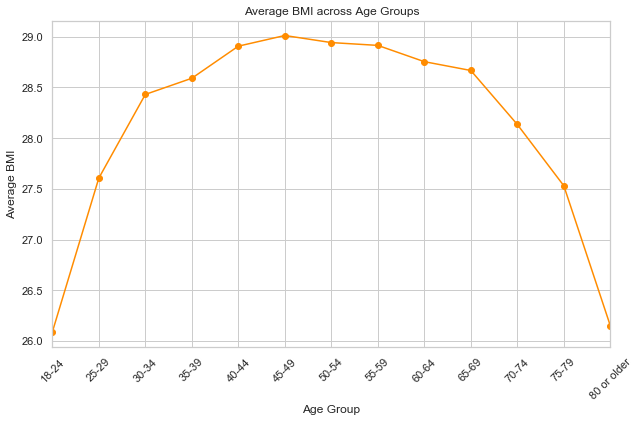

In [18]:
# Calculate average BMI by age group
age_group_avg_bmi = diabetes_df.groupby('Age')['BMI'].mean()

# Set the style for the plots
plt.figure(figsize=(10, 6))

# Create the line plot
age_group_avg_bmi.plot(kind='line', color='darkorange', marker='o')

# Set the title and labels
plt.title('Average BMI across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')

# Update x-ticks with labels from 1 to 13
plt.xticks(ticks=range(1, 14), labels=[
    '18-24', '25-29', '30-34', '35-39', '40-44', 
    '45-49', '50-54', '55-59', '60-64', '65-69', 
    '70-74', '75-79', '80 or older'
], rotation=45)

plt.show()


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
diabetes_df[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']] = scaler.fit_transform(diabetes_df[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']])

In [20]:
# Head of the dataset to cehck the StandardScalar
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6,0.5,1.0,0.0,0.666667,4.0,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.500000,6.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0,1.0,1.0,0.0,0.666667,4.0,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.833333,3.0,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,5.0,0.428571


In [21]:
# Define features and target variable
X = diabetes_df.drop(columns=['Diabetes_binary'])
y = diabetes_df['Diabetes_binary']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.48      0.17      0.25      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736

Confusion Matrix:
 [[42408  1331]
 [ 5784  1213]]
Accuracy: 0.8597642699463891


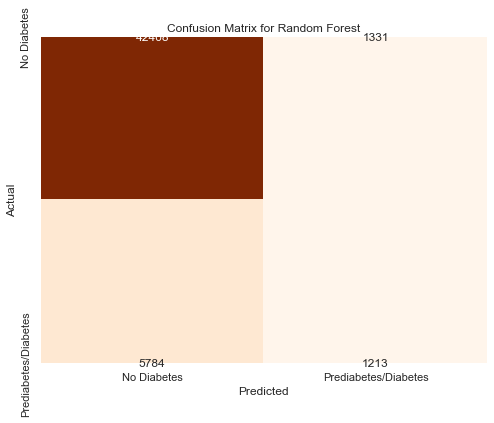

In [23]:
# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', cbar=False, 
            xticklabels=['No Diabetes', 'Prediabetes/Diabetes'], 
            yticklabels=['No Diabetes', 'Prediabetes/Diabetes'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

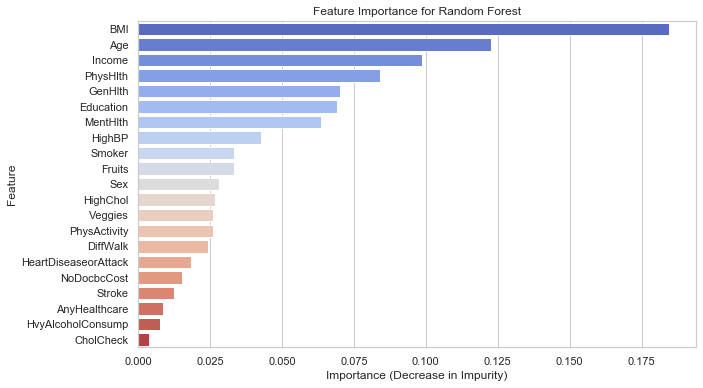

In [24]:
# Get the feature importance from the random forest model
importance_rf = rf_model.feature_importances_

# Create a DataFrame for better visualization
rf_features = pd.DataFrame({'Feature': X.columns, 'Importance': importance_rf})

# Sort the features by importance
rf_features = rf_features.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_features, palette='coolwarm')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance (Decrease in Impurity)')
plt.ylabel('Feature')
plt.show()


In [25]:
# Generate insights based on the feature importance and correlations
important_features = rf_features[rf_features['Importance'] > 0.1] 
print("Key Features Influencing Diabetes:")
print(important_features)

Key Features Influencing Diabetes:
   Feature  Importance
3      BMI    0.184635
18     Age    0.122643


In [26]:
# Initialize and fit the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.16      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

Confusion Matrix:
 [[42777   962]
 [ 5845  1152]]
Accuracy: 0.8658349101229896


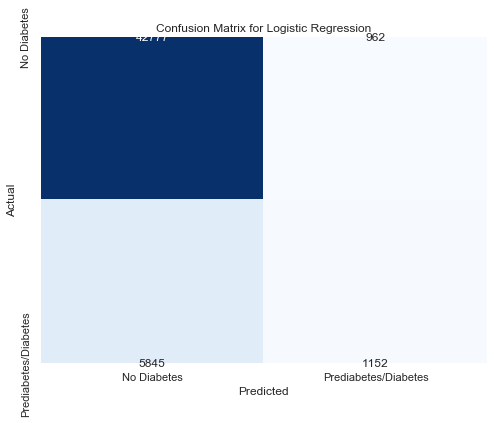

In [27]:
# Generate the confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Prediabetes/Diabetes'], 
            yticklabels=['No Diabetes', 'Prediabetes/Diabetes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

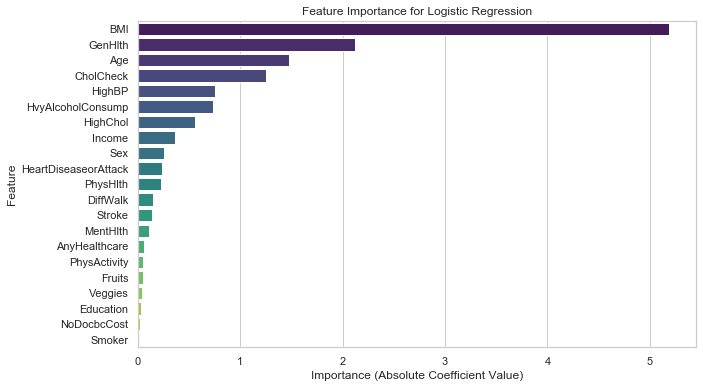

In [28]:
# Get the feature importance from the logistic regression coefficients
importance_logistic = abs(logistic_model.coef_[0])

# Create a DataFrame for better visualization
logistic_features = pd.DataFrame({'Feature': X.columns, 'Importance': importance_logistic})

# Sort the features by importance
logistic_features = logistic_features.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=logistic_features, palette='viridis')
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')
plt.show()


In [29]:
# Generate insights based on the feature importance from Logistic Regression
important_features_logistic = logistic_features[logistic_features['Importance'] > 0.1]  
print("Key Features Influencing Diabetes (Logistic Regression):")
print(important_features_logistic)


Key Features Influencing Diabetes (Logistic Regression):
                 Feature  Importance
3                    BMI    5.190864
13               GenHlth    2.118005
18                   Age    1.471295
2              CholCheck    1.248947
0                 HighBP    0.750334
10     HvyAlcoholConsump    0.734305
1               HighChol    0.561555
20                Income    0.359182
17                   Sex    0.257920
6   HeartDiseaseorAttack    0.234267
15              PhysHlth    0.223086
16              DiffWalk    0.145752
5                 Stroke    0.141512
14              MentHlth    0.109136


In [30]:
# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.56      0.17      0.27      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736

Accuracy: 0.8675102491327656


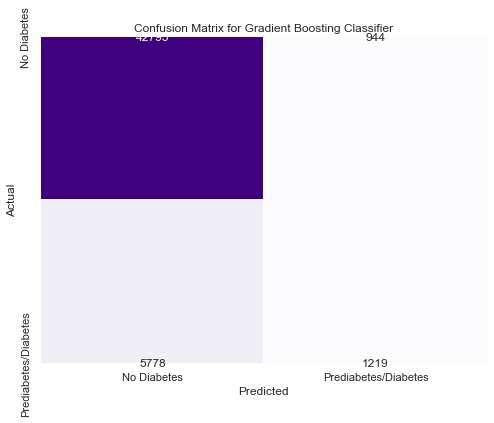

In [31]:
# Generate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples', cbar=False, 
            xticklabels=['No Diabetes', 'Prediabetes/Diabetes'], 
            yticklabels=['No Diabetes', 'Prediabetes/Diabetes'])
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


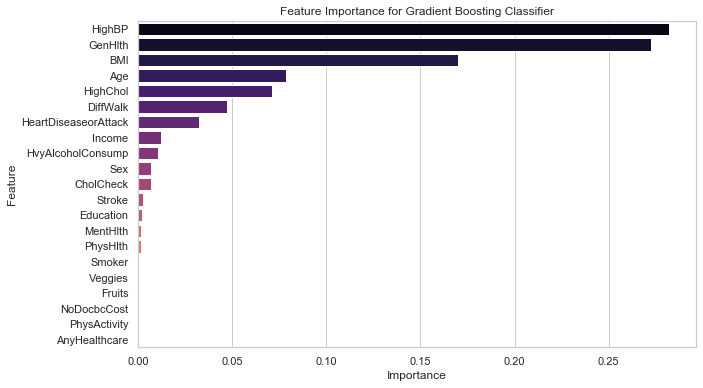

In [32]:
# Get feature importance from the Gradient Boosting model
importance_gb = gb_model.feature_importances_

# Create a DataFrame for better visualization
gb_features = pd.DataFrame({'Feature': X.columns, 'Importance': importance_gb})

# Sort the features by importance
gb_features = gb_features.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_features, palette='magma')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
